In [269]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [29]:
#--------------scrapped songs from spotify with their audio features-------------#

audio1_df = pd.read_csv('audio_features_album.csv')
audio2_df = pd.read_csv('audio_features_album2.csv')
audio3_df = pd.read_csv('audio_features_album3.csv')
audio4_df = pd.read_csv('audio_features_album4.csv')
audio5_df = pd.read_csv('audio_features_album5.csv')
audio6_df = pd.read_csv('audio_features_album6.csv')
audio7_df = pd.read_csv('audio_features_album7.csv')
audio8_df = pd.read_csv('audio_features_album8.csv')
audio9_df = pd.read_csv('audio_features_album9.csv')

In [251]:
#--------concatination of the all audio files----------#

df = pd.concat([audio1_df,audio2_df,audio3_df,audio4_df,audio5_df,audio6_df,audio7_df,audio8_df,audio9_df],ignore_index = True)
df.tail(1) 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artist,song_name
2051,0.877,0.854,1,-4.523,1,0.147,0.0544,0.000055,0.144,0.54,114.472,audio_features,0sKlV58cODrjxGFOyf9IXY,spotify:track:0sKlV58cODrjxGFOyf9IXY,https://api.spotify.com/v1/tracks/0sKlV58cODrj...,https://api.spotify.com/v1/audio-analysis/0sKl...,298120,4,Michael Jackson,The Way You Make Me Feel - 2012 Remaster


In [252]:
#-----------removing the duplicates------#  

df = df.drop_duplicates().reset_index()

In [253]:
df.tail(1)

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artist,song_name
1675,2051,0.877,0.854,1,-4.523,1,0.147,0.0544,0.000055,0.144,...,114.472,audio_features,0sKlV58cODrjxGFOyf9IXY,spotify:track:0sKlV58cODrjxGFOyf9IXY,https://api.spotify.com/v1/tracks/0sKlV58cODrj...,https://api.spotify.com/v1/audio-analysis/0sKl...,298120,4,Michael Jackson,The Way You Make Me Feel - 2012 Remaster


In [254]:
#---------------droping columns prior to modelling-------------#

x = df.drop(['time_signature','index','type', 'id', 'uri', 'track_href', 'analysis_url', 'artist', 'song_name'], axis = 1)

In [255]:
#---------------standardization of the features (z-score)-------------#

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [256]:
#----Before Scaling-----#

x.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.658,0.634,1,-5.797,0,0.0413,0.0106,0.000000,0.132,0.290,139.980,170813
1,0.333,0.637,1,-4.904,0,0.0581,0.1310,0.000018,0.149,0.132,139.898,172693
2,0.713,0.676,10,-5.483,1,0.0270,0.0377,0.000000,0.154,0.721,99.048,227395
3,0.748,0.551,11,-6.120,1,0.0349,0.2350,0.000000,0.119,0.660,103.953,144533
4,0.595,0.759,11,-4.245,0,0.0423,0.1410,0.000000,0.172,0.515,80.953,163733


In [257]:
#----After Scaling-----#

x_scaled_df = pd.DataFrame(x_scaled, columns = x.columns)
x_scaled_df.head() 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.607923,0.499544,-1.103639,0.804364,-1.396676,-0.411186,-1.067508,-0.810434,-0.152548,-0.415202,0.869689,-0.441422
1,-0.974886,0.508562,-1.103639,0.893629,-1.396676,-0.179240,-0.777437,-0.810392,-0.000396,-1.013377,0.866932,-0.409787
2,0.875783,0.625801,1.450410,0.835752,0.715986,-0.608616,-1.002218,-0.810434,0.044354,1.216529,-0.506498,0.510701
3,1.046240,0.250036,1.734194,0.772077,0.715986,-0.499546,-0.526877,-0.810434,-0.268899,0.985588,-0.341586,-0.883644
4,0.301102,0.875308,1.734194,0.959502,-1.396676,-0.397380,-0.753344,-0.810434,0.205456,0.436630,-1.114876,-0.560559


In [258]:
len(x_scaled_df)

1676

<AxesSubplot:>

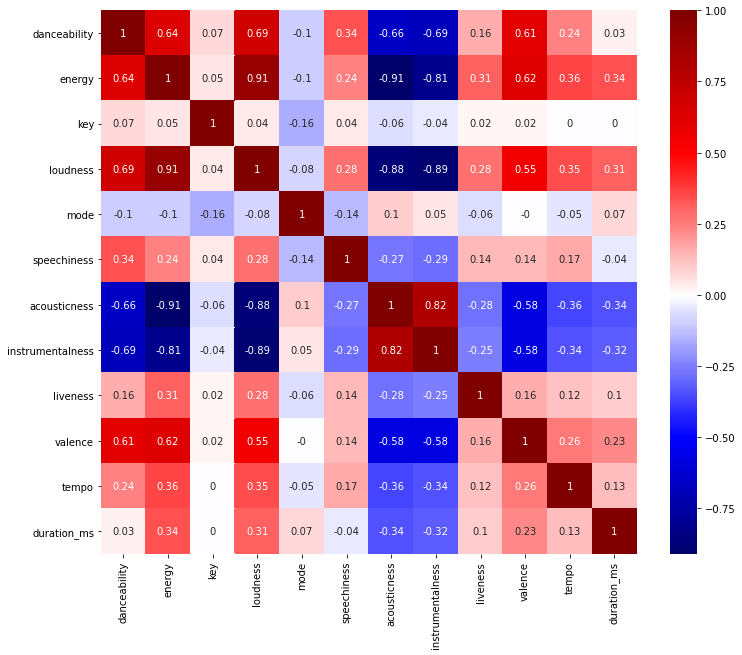

In [247]:
#-------------correlation--------------#

fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(round(x_scaled_df.corr(),2), annot = True, cmap="seismic", center = 0)


Choice of features based on the correlation: 
 
**danceability, key, speechiness, accousticness, tempo, duration_ms**  
 
Not taken into account:
   'energy':  high correlation (> 90%) with acousticness and loudness.
   'loudness': high correlation (88%) with acousticness
   'mode'
   'instrumentalness': high correlation (88%) with acousticness and (69%) with danceability .
   
 

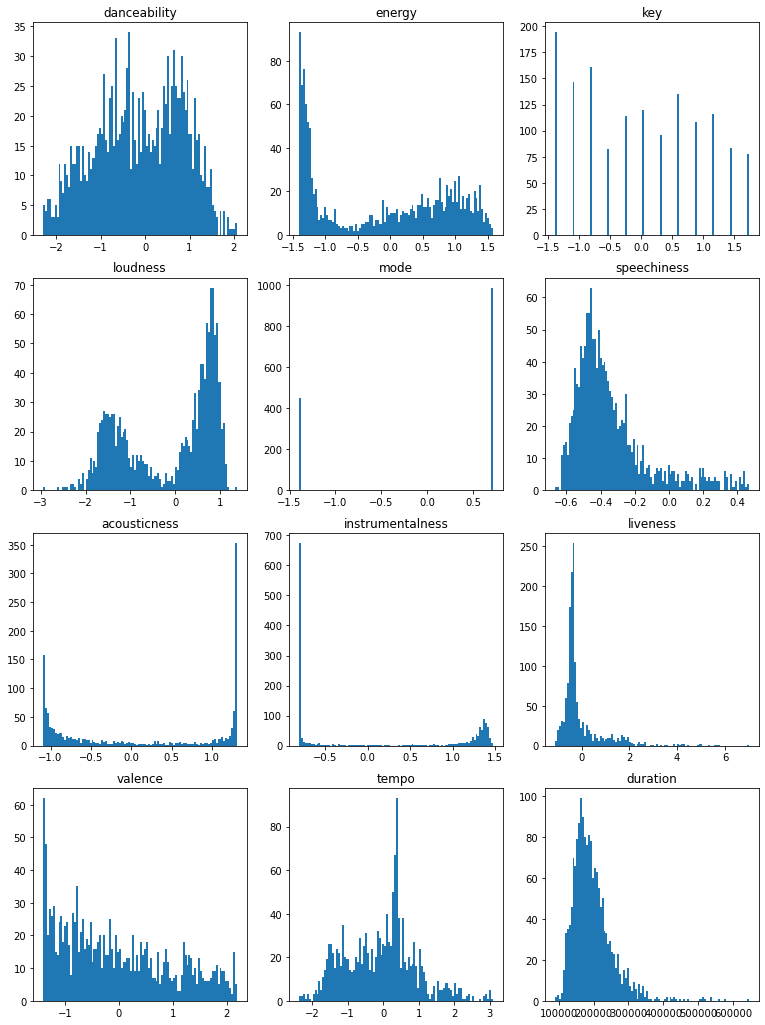

In [249]:
fig, ax = plt.subplots(4,3, figsize = (13,18))

ax[0,0].set_title('danceability')
ax[0,1].set_title('energy')
ax[0,2].set_title('key')
ax[1,0].set_title('loudness')
ax[1,1].set_title('mode')
ax[1,2].set_title('speechiness')
ax[2,0].set_title('acousticness')
ax[2,1].set_title('instrumentalness')
ax[2,2].set_title('liveness')
ax[3,0].set_title('valence')
ax[3,1].set_title('tempo')
ax[3,2].set_title('duration')


ax[0,0].hist(x_scaled_df['danceability'], bins = 100)           #sns.distplot(dataframe)
ax[0,1].hist(x_scaled_df['energy'], bins = 100)
ax[0,2].hist(x_scaled_df['key'], bins = 100)
ax[1,0].hist(x_scaled_df['loudness'], bins =100)
ax[1,1].hist(x_scaled_df['mode'], bins =100)
ax[1,2].hist(x_scaled_df['speechiness'], bins =100)
ax[2,0].hist(x_scaled_df['acousticness'], bins =100)
ax[2,1].hist(x_scaled_df['instrumentalness'], bins =100)
ax[2,2].hist(x_scaled_df['liveness'], bins =100)
ax[3,0].hist(x_scaled_df['valence'], bins =100)
ax[3,1].hist(x_scaled_df['tempo'], bins =100)
ax[3,2].hist(df['duration_ms'], bins =100)


plt.show()

In [259]:
x_scaled_df = x_scaled_df.drop(['mode', 'loudness', 'energy', 'instrumentalness', 'liveness'], axis = 1)
x_scaled_df

,danceability,key,speechiness,acousticness,valence,tempo,duration_ms
0,0.607923,-1.103639,-0.411186,-1.067508,-0.415202,0.869689,-0.441422
1,-0.974886,-1.103639,-0.179240,-0.777437,-1.013377,0.866932,-0.409787
2,0.875783,1.450410,-0.608616,-1.002218,1.216529,-0.506498,0.510701
3,1.046240,1.734194,-0.499546,-0.526877,0.985588,-0.341586,-0.883644
4,0.301102,1.734194,-0.397380,-0.753344,0.436630,-1.114876,-0.560559
...,...,...,...,...,...,...,...
1671,1.713455,-1.103639,-0.257936,-0.743707,1.916924,0.252806,1.713382
1672,1.294619,-0.819856,-0.144725,-0.983908,0.447988,0.880751,0.767688
1673,0.028371,-1.387423,-0.329729,-0.269089,0.800078,-0.057620,1.401959
1674,-0.736247,1.166627,-0.612758,-0.981017,-0.244836,0.872345,0.779349


In [230]:
#-----------treating the outliers-----------#

#IQR = x_scaled_df['speechiness'].quantile(0.75) - x_scaled_df['speechiness'].quantile(0.25)          #----outliers threshhold calculation based on IQR----#                                                             
#outlier_threshhold = IQR*1.5 + x_scaled_df['speechiness'].quantile(0.75)        
#x_scaled_df = x_scaled_df[x_scaled_df['speechiness'] <= outlier_threshhold]

#x = x[x['speechiness'] <= outlier_threshhold]

In [260]:
len(x_scaled_df)

1676

In [261]:
#--------------K Means Clustering------------#

kmeans = KMeans(n_clusters = 8, random_state = 15)
kmeans.fit(x_scaled_df)

KMeans(random_state=15)

In [262]:
kmeans.labels_

array([6, 6, 2, ..., 1, 2, 1])

In [263]:
len(kmeans.labels_)

1676

In [264]:
kmeans.inertia_

4358.123427729633

In [265]:
#--------------Model prediction results on the training data------------#

clusters = kmeans.predict(x_scaled_df)
pd.Series(clusters).value_counts().sort_index()

0    248
1    233
2    326
3    127
4    162
5    107
6    246
7    227
dtype: int64

In [270]:
#---------addition of the cluster to the original imported dataframe---------#

df['cluster'] = clusters
df.head()

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artist,song_name,cluster
0,0,0.658,0.634,1,-5.797,0,0.0413,0.0106,0.000000,0.132,...,audio_features,4u4NyuceXP7Uzh7XFJKCr1,spotify:track:4u4NyuceXP7Uzh7XFJKCr1,https://api.spotify.com/v1/tracks/4u4NyuceXP7U...,https://api.spotify.com/v1/audio-analysis/4u4N...,170813,4,Justin Bieber,Hold On,6
1,1,0.333,0.637,1,-4.904,0,0.0581,0.1310,0.000018,0.149,...,audio_features,5KCbr5ndeby4y4ggthdiAb,spotify:track:5KCbr5ndeby4y4ggthdiAb,https://api.spotify.com/v1/tracks/5KCbr5ndeby4...,https://api.spotify.com/v1/audio-analysis/5KCb...,172693,4,Shawn Mendes,Wonder,6
2,2,0.713,0.676,10,-5.483,1,0.0270,0.0377,0.000000,0.154,...,audio_features,6fRxMU4LWwyaSSowV441IU,spotify:track:6fRxMU4LWwyaSSowV441IU,https://api.spotify.com/v1/tracks/6fRxMU4LWwya...,https://api.spotify.com/v1/audio-analysis/6fRx...,227395,4,Maroon 5 & Megan Thee Stallion,Beautiful Mistakes (feat. Megan Thee Stallion),2
3,3,0.748,0.551,11,-6.120,1,0.0349,0.2350,0.000000,0.119,...,audio_features,472vIK1ldetTxRxG3ovaiY,spotify:track:472vIK1ldetTxRxG3ovaiY,https://api.spotify.com/v1/tracks/472vIK1ldetT...,https://api.spotify.com/v1/audio-analysis/472v...,144533,4,Dan + Shay,Glad You Exist,2
4,4,0.595,0.759,11,-4.245,0,0.0423,0.1410,0.000000,0.172,...,audio_features,5zqObw7wjBgL9TDiAymxPn,spotify:track:5zqObw7wjBgL9TDiAymxPn,https://api.spotify.com/v1/tracks/5zqObw7wjBgL...,https://api.spotify.com/v1/audio-analysis/5zqO...,163733,4,Anne-Marie & Niall Horan,Our Song,2


In [271]:
#--------------saving the data frame including the cluster information to the csv file--------#

df.to_csv('the_clustered_spotify_songs.csv', index = False)

In [267]:
kmeans2 = KMeans(n_clusters=8,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(x_scaled_df)
print(kmeans2.inertia_)

4358.573468652329


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

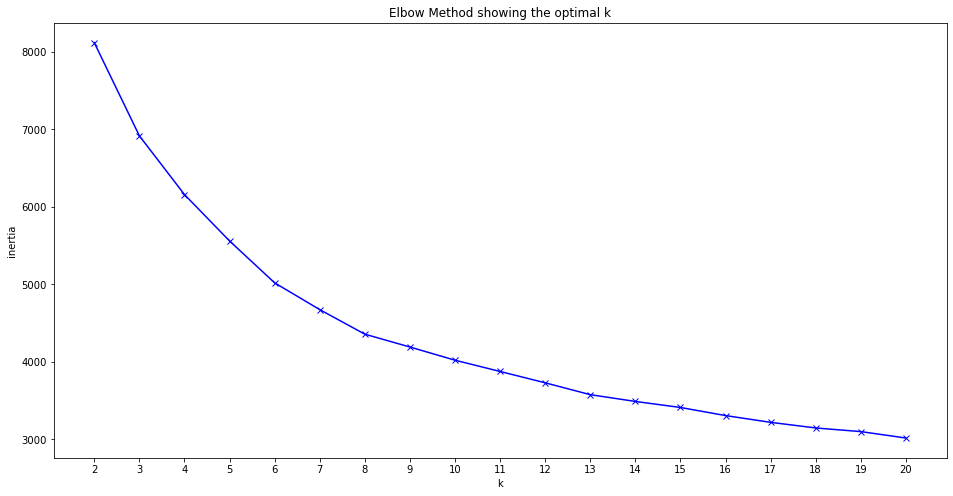

In [268]:
K = range(2, 21)
inertia = []

for k in K:
    #print("Training a K-Means model with {} neighbours! ".format(k))
    #print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(x_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

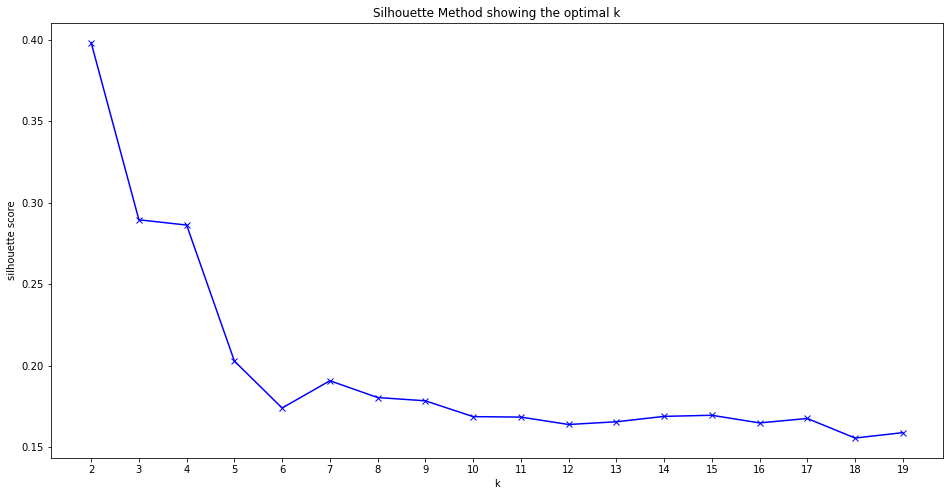

In [240]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import pickle


K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(x_scaled_df)
    #filename = "Model/kmeans_" + str(k) + ".pickle"
    #with open(filename, "wb") as f:
        #pickle.dump(kmeans,f)
    silhouette.append(silhouette_score(x_scaled_df, kmeans.predict(x_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [ ]:
#visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

In [ ]:


#scaler = StandardScaler()
#model = KMeans()

with open("Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("Model/kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [ ]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
    except FileNotFoundError: 
        print("File not found!")



In [ ]:
scaler2 = load("Model/scaler.pickle")
scaler2